In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', 500)
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
path = 'storage/yelp_data/health_raw00.csv'

In [4]:
df = pd.read_csv(path)
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54756 entries, 0 to 54755
Data columns (total 12 columns):
business_id    54756 non-null object
name           54756 non-null object
categories     54756 non-null object
cool           54756 non-null int64
date           54756 non-null object
funny          54756 non-null int64
review_id      54756 non-null object
stars          54756 non-null int64
text           54756 non-null object
useful         54756 non-null int64
user_id        54756 non-null object
len_text       54756 non-null int64
dtypes: int64(5), object(7)
memory usage: 5.0+ MB


In [10]:
#df.head()

## split review stars and text

In [7]:
data = df[['stars','text']]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54756 entries, 0 to 54755
Data columns (total 2 columns):
stars    54756 non-null int64
text     54756 non-null object
dtypes: int64(1), object(1)
memory usage: 855.6+ KB


In [9]:
data.head()

,stars,text
0,1,Please stay away from this place if you can! It's the worst care imaginable! The staff is very uneducated and doesn't know anything. If you ask a question they give you an answer that doesn't even pertain to what you just asked. It's super bizarre. Dr Byrne doesn't seem to care at all about how you feel I got the impression she just wants to get you in and out and make her money. That's just the feeling that was put out there in my visit. The staff is super rude. I wanted to speak again with...
1,5,My husband has been a patient of Dr. Byrne for the last year and a half. Last May he was suffering from kidney stones and we were referred to Dr. Byrne. After being examined and having tests run it was determined he would need surgery. He was scheduled for surgery a week later and sent home with major pain medications. Even while taking the medications my husband was so incapacitated and in such pain Dr. Bryne went out of her way to call other hospitals and reschedule him for emergency surg...
2,4,Dr. Byrne is a great doctor! She has great bed side manners and explains to you step by step of what shes doing. The office staff is not the best. They always make you wait a long time before you get called back. But my overall experience with Dr. Byrne is very good. Im happy i chose her for my procedure and i highly recommend her.
3,3,"I'm raising my review as Dr Bryne's has been more receptive. My daughter can go in anytime and leave urine sample, so she doesn't have to go to Urgent Care who seems to always mess up anyway and doesn't provide info back to Dr.\n\nShe is very smart. If things keep looking up, I may try her out with other family members. I heard her coach receptionist on last visit in a nice and professional way. \n\nIn general I don't understand why medical receptionists can be so bad across the medical ..."
4,1,"I wish I could give 0 stars. Worst office I've ever been to. Such a horrible experience!!! Office staff is a bunch of teens with bad attitudes including the office manager. I made my appointment to consult Dr. Byrne at the Ironwood Gilbert location about my non-responsive to antibiotics UTI. Though there was an urgency as my symptoms kept getting worse and my PCP recommended seeing a urologist ASAP, the first appointment was available after10 days. I gave all my information including insuran..."


### stars

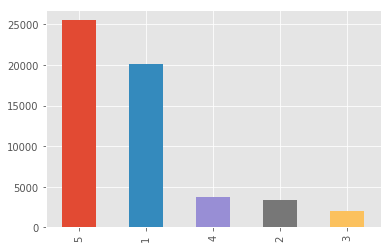

In [12]:
data.stars.value_counts().plot.bar()

### Split positive and negtative
- total positive 31,186
- total negative : 22451
- total meh : 10,853

drop 2-4

In [13]:
all_stars = data.copy()

In [14]:
data = data.ix[np.where((data.stars==1)|(data.stars==5))]

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45631 entries, 0 to 54755
Data columns (total 2 columns):
stars    45631 non-null int64
text     45631 non-null object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


In [16]:
data.stars.value_counts()

5    25502
1    20129
Name: stars, dtype: int64

In [17]:
data.head()

,stars,text
0,1,Please stay away from this place if you can! It's the worst care imaginable! The staff is very uneducated and doesn't know anything. If you ask a question they give you an answer that doesn't even pertain to what you just asked. It's super bizarre. Dr Byrne doesn't seem to care at all about how you feel I got the impression she just wants to get you in and out and make her money. That's just the feeling that was put out there in my visit. The staff is super rude. I wanted to speak again with...
1,5,My husband has been a patient of Dr. Byrne for the last year and a half. Last May he was suffering from kidney stones and we were referred to Dr. Byrne. After being examined and having tests run it was determined he would need surgery. He was scheduled for surgery a week later and sent home with major pain medications. Even while taking the medications my husband was so incapacitated and in such pain Dr. Bryne went out of her way to call other hospitals and reschedule him for emergency surg...
4,1,"I wish I could give 0 stars. Worst office I've ever been to. Such a horrible experience!!! Office staff is a bunch of teens with bad attitudes including the office manager. I made my appointment to consult Dr. Byrne at the Ironwood Gilbert location about my non-responsive to antibiotics UTI. Though there was an urgency as my symptoms kept getting worse and my PCP recommended seeing a urologist ASAP, the first appointment was available after10 days. I gave all my information including insuran..."
5,1,I went to the emergency room because i was having a kidney stone attack. The emergency room recommended i see Dr. Lauren Byrne to resolve my kidney stone issue. I made the appointment and went in to see her. She was nice but very quick to get you in and out of your appointment. She asked the staff to put in for a CAT scan at the Ironwood scan facility and they would call me. I went in for my follow up appointment a week later and they had not called me for the scan. The office put in a...
6,5,"Dr. Byrne is an excellent doctor with all the right skills, including a very good bed side manner. I treated with her for prostate cancer. I originally went in for another issue but because of her thoroughness and the ability to spot red flags in the exam she decided to do a cancer screening. The test wasn't much fun, but it showed the early stages of cancer. She gave me my options and told me the positives and negatives of each option. When I decided to have surgery she turned me over ..."


In [18]:
all_stars.head()

,stars,text
0,1,Please stay away from this place if you can! It's the worst care imaginable! The staff is very uneducated and doesn't know anything. If you ask a question they give you an answer that doesn't even pertain to what you just asked. It's super bizarre. Dr Byrne doesn't seem to care at all about how you feel I got the impression she just wants to get you in and out and make her money. That's just the feeling that was put out there in my visit. The staff is super rude. I wanted to speak again with...
1,5,My husband has been a patient of Dr. Byrne for the last year and a half. Last May he was suffering from kidney stones and we were referred to Dr. Byrne. After being examined and having tests run it was determined he would need surgery. He was scheduled for surgery a week later and sent home with major pain medications. Even while taking the medications my husband was so incapacitated and in such pain Dr. Bryne went out of her way to call other hospitals and reschedule him for emergency surg...
2,4,Dr. Byrne is a great doctor! She has great bed side manners and explains to you step by step of what shes doing. The office staff is not the best. They always make you wait a long time before you get called back. But my overall experience with Dr. Byrne is very good. Im happy i chose her for my procedure and i highly recommend her.
3,3,"I'm raising my review as Dr Bryne's has been more receptive. My daughter can go in anytime and leave urine sample, so she doesn't have to go to Urgent Care who seems to always mess up anyway and doesn't provide info back to Dr.\n\nShe is very smart. If things keep looking up, I may try her out with other family members. I heard her coach receptionist on last visit in a nice and professional way. \n\nIn general I don't understand why medical receptionists can be so bad across the medical ..."
4,1,"I wish I could give 0 stars. Worst office I've ever been to. Such a horrible experience!!! Office staff is a bunch of teens with bad attitudes including the office manager. I made my appointment to consult Dr. Byrne at the Ironwood Gilbert location about my non-responsive to antibiotics UTI. Though there was an urgency as my symptoms kept getting worse and my PCP recommended seeing a urologist ASAP, the first appointment was available after10 days. I gave all my information including insuran..."


## Multinomial NB
-

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [20]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.958365289799496
CPU times: user 10.6 s, sys: 1.32 s, total: 11.9 s
Wall time: 11.9 s


In [21]:
%%time
# 1-5 starts
review = all_stars['text'].values.astype(str)
sentiments = all_stars['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = MultinomialNB()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 - 5 stars\n Accuracy=", score) 

1 - 5 stars
 Accuracy= 0.7908144631117604
CPU times: user 12.5 s, sys: 1.5 s, total: 14 s
Wall time: 14 s


## Multinomial NB Results


- all stars: `Accuracy= 0.8001240502403474`
- 1 & 5 starts: `Accuracy= 0.9561894108873975`

## LogisticRegression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()


# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 & 5 stars\n Accuracy=", score) 

1 & 5 stars
 Accuracy= 0.9718417881012381
CPU times: user 18.2 s, sys: 464 ms, total: 18.6 s
Wall time: 18.6 s


In [24]:
%%time
# 1-5 starts
review = all_stars['text'].values.astype(str)
sentiments = all_stars['stars'].values

# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)


vectorizer = CountVectorizer(lowercase=True)
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)

print("1 - 5 stars\n Accuracy=", score) 

1 - 5 stars
 Accuracy= 0.8024105186267348
CPU times: user 2min 17s, sys: 788 ms, total: 2min 18s
Wall time: 2min 18s


## LogisticRegression Results
- 1& 5 starts:` Accuracy= 0.97362043251305`
- 1- 5 stars : `Accuracy= 0.8069468134594511`

## Use Ngrams Instead of Words
- 1-3
- 1-2

In [25]:
%%time
# 1&5 starts
review = data['text'].values.astype(str)
sentiments = data['stars'].values

CPU times: user 60 ms, sys: 236 ms, total: 296 ms
Wall time: 296 ms


In [26]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [27]:
%%time
vectorizer = CountVectorizer(lowercase=True, ngram_range=(1,3))
# Compute the vocabulary only on the training data
vectorizer.fit(X_train)

# Transform the text list to a matrix form
X_train_vectorized = vectorizer.transform(X_train)

classifier = LogisticRegression()

# Train the classifier
classifier.fit(X_train_vectorized, y_train)

# Vectorize the test data
X_test_vectorized = vectorizer.transform(X_test)

# Check our classifier performance
score = classifier.score(X_test_vectorized, y_test)
print("Accuracy=", score)

Accuracy= 0.9781965596581571
CPU times: user 1min 28s, sys: 876 ms, total: 1min 28s
Wall time: 1min 29s


### Results
ngram_range=(1,2)
```
Accuracy= 0.8231508761048224
CPU times: user 10min 47s, sys: 27.3 s, total: 11min 14s
Wall time: 6min 58s
```

ngram_range=(1,3)
```
Accuracy= 0.829896107923709
CPU times: user 12min 47s, sys: 40.9 s, total: 13min 28s
Wall time: 9min 1s

```


- `Accuracy= 0.9793064876957495
`

#  pipeline
- Result `Accuracy= 0.9777218493661447`

In [28]:
from sklearn.pipeline import Pipeline

In [29]:
# Split the data for training and for testing and shuffle it
X_train, X_test, y_train, y_test = train_test_split(review, sentiments,
test_size=0.2, shuffle=True)

In [30]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', 
     CountVectorizer(lowercase=True,ngram_range=(1, 3)))
    ,('classifier', LogisticRegression())])

pipeline.fit(X_train, y_train)
# Check our classifier performance

score = pipeline.score(X_test, y_test)

print("Accuracy=", score)

Accuracy= 0.9753478689602278
CPU times: user 1min 43s, sys: 2.99 s, total: 1min 46s
Wall time: 2min 7s


## Cross validation score

In [31]:
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle

In [32]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])

CPU times: user 132 ms, sys: 52 ms, total: 184 ms
Wall time: 302 ms


In [33]:
review, sentiments = shuffle(review, sentiments) # needed??

In [36]:
review[9]

"My husband and I see Dr. Chisholm and he's fantastic. Knowledgeable, quick witted, respects our intelligence and respects our wishes/opinions but tempers my first time mom anxieties professionally and swiftly. We definitely feel like we are in great hands. The nurses are all amazing, the ultrasound techs are wonderful, and the front desk staff has been great to us too. We really love this office. I will say that sometimes there is a very long wait on hold when you call the front desk for non-emergency assistance, but I know they have a lot of patients. I'm excited to continue my happy and healthy pregnancy, and deliver with Dr. Chisholm in the autumn."

In [37]:
%%time
print("MeanAccuracy=", cross_val_score(pipeline, review, sentiments, cv=5).mean())

MeanAccuracy= 0.9772522953501108
CPU times: user 6min 11s, sys: 4.27 s, total: 6min 16s
Wall time: 6min 16s


## Result:
```
MeanAccuracy= 0.9773477193058582
CPU times: user 10min 21s, sys: 44.1 s, total: 11min 5s
Wall time: 8min 45s

```

## Grid search

In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [39]:
# shuffle data
review, sentiments = shuffle(review, sentiments)

In [40]:
%%time
# Put everything in a Pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(
        lowercase=True,
        ngram_range=(1, 3))),
    ('classifier', LogisticRegression())])


classifier = GridSearchCV(pipeline, {
    # try out different ngram ranges
    'vectorizer__ngram_range': ((1, 2), (2, 3), (1, 3)),
    # check if setting all non zero counts to 1 makes a difference
    'vectorizer__binary': (True, False),},
                          n_jobs=-1, 
                          verbose=True,
                          error_score=0.0, 
                          cv=5)

CPU times: user 4 ms, sys: 8 ms, total: 12 ms
Wall time: 9.08 ms


In [42]:
# %%time
# # Compute the vocabulary and train the classifier
# classifier.fit(review, sentiments)

In [ ]:
print("Best Accuracy: ", classifier.best_score_)
print("Best Parameters: ", classifier.best_params_)

## notes
- find nums truep/true neg
- 